C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\i

[0.74514047]
[1.47839342]


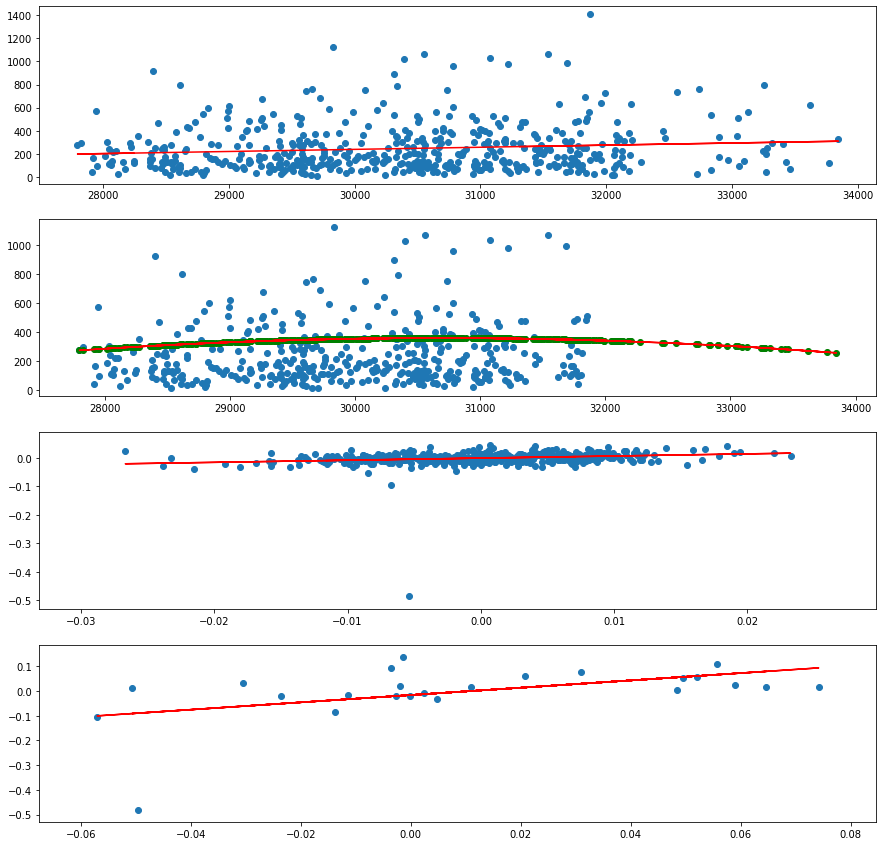

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 26 10:51:55 2020

@author: Jawahar
"""
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
%matplotlib inline

#pred,new gold
fig,ax=plt.subplots(4,figsize=(15,15))
gld=pd.read_csv('GOLD.csv')
gld['avg']=(gld['High']+gld['Low']+gld['Open']+gld['Price'])/4
gold=gld[gld['Pred'].notnull()]
model=LinearRegression(fit_intercept=True)
model.fit(gld.avg.as_matrix().reshape(512,1),gld.new)
ypred=model.predict(gld.avg.as_matrix().reshape(512,1))
ax[0].scatter(gld['avg'],gld['new'])
ax[0].plot(gld['avg'],ypred,color='red')
gld['newpred']=pd.Series(ypred) 
model = make_pipeline(PolynomialFeatures(2),LinearRegression(fit_intercept=True))
model.fit(gold.avg.as_matrix().reshape(411,1),gold.Pred)
ypred=model.predict(gld.avg.as_matrix().reshape(512,1))
ax[1].scatter(gold['avg'],gold['new'])
ax[1].scatter(gld['avg'],ypred,color='green')
ax[1].plot(gld['avg'],ypred,color='red')
ser=pd.Series(ypred[411:])
ser=pd.concat((gold.Pred,ser),axis=0)
ser.index=gld.index
gld['pred']=ser



#beta calculation(daily)
infy=pd.read_csv('week2.csv')
nfty=pd.read_csv('NIFTY50.csv')
nfty.set_index(pd.to_datetime(nfty.Date),inplace=True)
nftys=nfty.shift(1)
infys=infy.shift(1)
nfty['daily_return']=nfty['Close']/nftys['Close']-1
infy['daily_return']=infy['Close Price']/infys['Close Price']-1
nfty.dropna(axis=0,inplace=True)
infy.dropna(axis=0,inplace=True)
model=LinearRegression(fit_intercept=True)
model.fit(nfty.daily_return.as_matrix().reshape(493,1),infy.daily_return.as_matrix())
ypred=model.predict(nfty.daily_return.as_matrix().reshape(493,1))
ax[2].scatter(nfty['daily_return'],infy['daily_return'])
ax[2].plot(nfty['daily_return'],ypred,color='red')
daily_beta=model.coef_
print(daily_beta)



#beta calculation(monthly)
nfty['month']=nfty.index.month
nfty['year']=nfty.index.year
infy.set_index(pd.to_datetime(infy.Date),inplace=True)    
infym=infy.groupby(['year','month']).first()
nftym=nfty.groupby(['year','month']).first()
nftys=nftym.shift(1)
infys=infym.shift(1)
nftym['monthly_return']=nftym['Close']/nftys['Close']-1
infym['monthly_return']=infym['Close Price']/infys['Close Price']-1
nftym.dropna(axis=0,inplace=True)
infym.dropna(axis=0,inplace=True)
model=LinearRegression(fit_intercept=True)
model.fit(nftym.monthly_return.as_matrix().reshape(24,1),infym.monthly_return.as_matrix())
ypred=model.predict(nftym.monthly_return.as_matrix().reshape(24,1))
ax[3].scatter(nftym['monthly_return'],infym['monthly_return'])
ax[3].plot(nftym['monthly_return'],ypred,color='red')
monthly_beta=model.coef_
print(monthly_beta)

#when beta is 1 it moves along with market. 0 means doesnt move. negative valus indicate it moves opposite to market
# i found out that the beta value is helpful in identifying stocks that are either riskier and more returns or less riskier and less returns.
# the infosys stock has a beta value of 0.7 as daily hence this is low moving stock with respect to the market.

In [3]:
model=LinearRegression(fit_intercept=True)
model.fit(gld.avg.as_matrix().reshape(512,1),gld.new)
ypred=model.predict(gld.avg.as_matrix().reshape(512,1))
print(model.coef_)

[0.01831227]


C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Jawahar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
print(model.intercept_)

-310.92423080426465
